In [215]:
import numpy as np
import torch 
import torchvision
from sklearn.datasets import fetch_mldata
from torchvision import datasets,transforms
from PIL import Image
from collections import Counter

In [88]:
data_train = datasets.MNIST(root = './data/',transform=transforms.ToTensor(),
                train = True,download = True)
data_test=datasets.MNIST(root='./data/',transform=transforms.ToTensor(),
                        train=False,download=True)

In [14]:
MD=lambda x:np.dot(np.dot((x).T,np.linalg.inv(D)),(x))

In [89]:
batchsize=100
trainset=torch.utils.data.DataLoader(data_train,batch_size=batchsize)
testset=torch.utils.data.DataLoader(data_test,batch_size=batchsize)

In [335]:
# 基于L2范数的KNN算法
def knnl2(X,k):
    labelk=np.ones((k,1))
    distank=np.ones((k,1))*1e9
    X=X.squeeze()
    X=X.numpy().reshape(-1,1)
    for Data,label in trainset:
        Data=Data.view(100,28*28).numpy()
        m,n=Data.shape
        L2dis=np.zeros((m,1))
        XY=Data-X.T
        L2dis=np.linalg.norm(XY,axis=1).reshape(-1,1)
        index=np.argsort(L2dis)      
        indth,_=np.where(distank>L2dis[index[0]])
        label=label.view(-1,1).numpy()
        labelk[indth,:]=label[0:len(indth)]
        distank[indth,:]=L2dis[0:len(indth)]
    labelk=labelk.flatten()    
    print(labelk)
    labelk=labelk.tolist()
    result=Counter(labelk).most_common(1)[0]
    return result

In [329]:
# 基于马氏距离的KNN算法
def knnmar(X,k):
    labelk=np.ones((k,1))
    distank=np.ones((k,1))*1e9
    X=X.squeeze()
    X=X.numpy().reshape(-1,1)
    for Data,label in trainset:
        Data=Data.view(100,28*28).numpy()
        Data=np.vstack((Data,X.T))
        m,n=Data.shape
        Covm=np.cov(Data.T)
        Mardis=np.zeros((m,1))
        XY=Data-X.T
        for i in range(m-1):
            xy=XY[i,:]
            Mardis[i]=np.dot(np.dot(xy,Covm),xy)
        index=np.argsort(Mardis)      
        indth,_=np.where(distank>Mardis[index[0]])
        label=label.view(-1,1).numpy()
        labelk[indth,:]=label[0:len(indth)]
        distank[indth,:]=Mardis[0:len(indth)]
    labelk=labelk.flatten()    
    print(labelk)
    labelk=labelk.tolist()
    result=Counter(labelk).most_common(1)[0]
    return result

In [336]:
data,label=iter(testset).next()
knnl2(data[0,:],5)

[7. 7. 7. 7. 9.]


(7.0, 4)

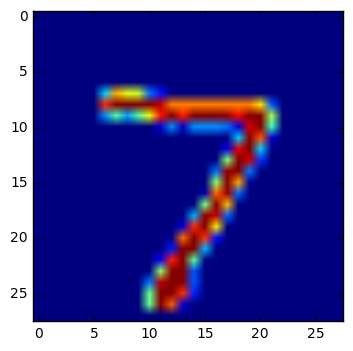

In [332]:
image=data[0,:].squeeze().numpy()
plt.figure()
plt.imshow(image)
plt.show()

In [252]:
data1=data.view(-1,28*28).numpy()
covm=np.cov(data1.T)
covm.shape

(784, 784)

In [311]:
X=data[0,:].squeeze().numpy().reshape(-1,1)
Data=data
Data=Data.view(100,28*28).numpy()
Data=np.vstack((Data,X.T))
m,n=Data.shape
Covm=np.cov(Data.T)
Mardis=np.zeros((m,1))
XY=Data-X.T

In [314]:
xy=XY[2,:]
Mardis[0]=np.dot(np.dot(xy,Covm),xy)
print(Mardis[0])

[180.19804043]


In [320]:
labelk=[7,7, 7, 9, 7]
result=Counter(labelk).most_common(1)

In [323]:
result

[(7, 4)]

In [325]:
np.linalg.norm(labelk)

16.64331697709324

In [326]:
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])

In [328]:
np.linalg.norm(x,axis=0)

array([1.        , 6.70820393, 5.65685425])